<a href="https://www.kaggle.com/code/neenues/regression-flood-prediction-catboost" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Regression with a Flood Prediction Dataset](https://www.kaggle.com/competitions/playground-series-s4e5)
### Playground Series - Season 4, Episode 4.
_______________________________________________________________________ 
# Author Details:
- Name: Neenu E S
- Profiles: [Github](https://github.com/neenu05) | [LinkedIn](https://www.linkedin.com/in/neenues/) | [Kaggle](https://www.kaggle.com/neenues)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:
[Walter Reade, Ashley Chow. (2024). Regression with a Flood Prediction Dataset. Kaggle.] (https://kaggle.com/competitions/playground-series-s4e5)

__________________________________________________________________________
# Code Execution : 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/neenues/regression-flood-prediction-catboost/edit/run/178056409)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:

from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

##### Lets Explore the data

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
train_df.shape

(1117957, 22)

In [5]:
#Checking the dataset description
describe = train_df.describe()
describe.transpose()

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531782,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

###### About Dataset:
Flood Prediction determination from population+land+climate+political factors

Independent Factors -

1. Monsoon Intensity: The amount of rainfall during the monsoon season, which is a major cause of floods.

2. TopographyDrainage: A continuous variable that reflects the topography's ability to drain water and affects how water moves during periods of intense precipitation. Here are a few of the characteristics.

3. RiverManagement
4. Deforestation
5. Urbanization
6. ClimateChange
7. DamsQuality
8. Siltation
9. AgriculturalPractices
10. Encroachments
11. IneffectiveDisasterPreparedness
12. DrainageSystems

13. Coastal Vulnerability: This variable shows how susceptible coastal regions are to tidal flooding and storm surges.

14. Landslides: It describes the possibility of landslides, which can obstruct river courses and cause flash floods.

15. Watersheds: This variable describes how well watersheds are doing. Watersheds are essential for controlling water flow and averting flooding.

16. Deteriorating Infrastructure: It examines the roads, bridges, and levees that may have an impact on the ability to control flooding.

17. PopulationScore: The distribution and density of people in flood-prone locations, which affects flood resistance and susceptibility.

18. Wetland Loss: the disappearance of wetlands, which naturally absorb and store extra water to prevent floods.

19. Inadequate Planning: The ability of flood mitigation techniques and land use planning to lower the danger of flooding.

20. PoliticalFactors: A continuous variable that reflects the governance and political aspects influencing the policies and infrastructure investments related to flood management.

Dependent Factor -

21. FloodingProbability: Based on a number of variables and historical data, this target variable indicates the possibility or probability of flooding.


In [7]:
#Check for nulll values
train_df.isnull().sum() ## no null values

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [8]:
#Check for any duplicate values
train_df[train_df.duplicated()]

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability


In [9]:
train_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [10]:
train_df.drop(['id'], axis=1, inplace=True)

### Histogram Analysis

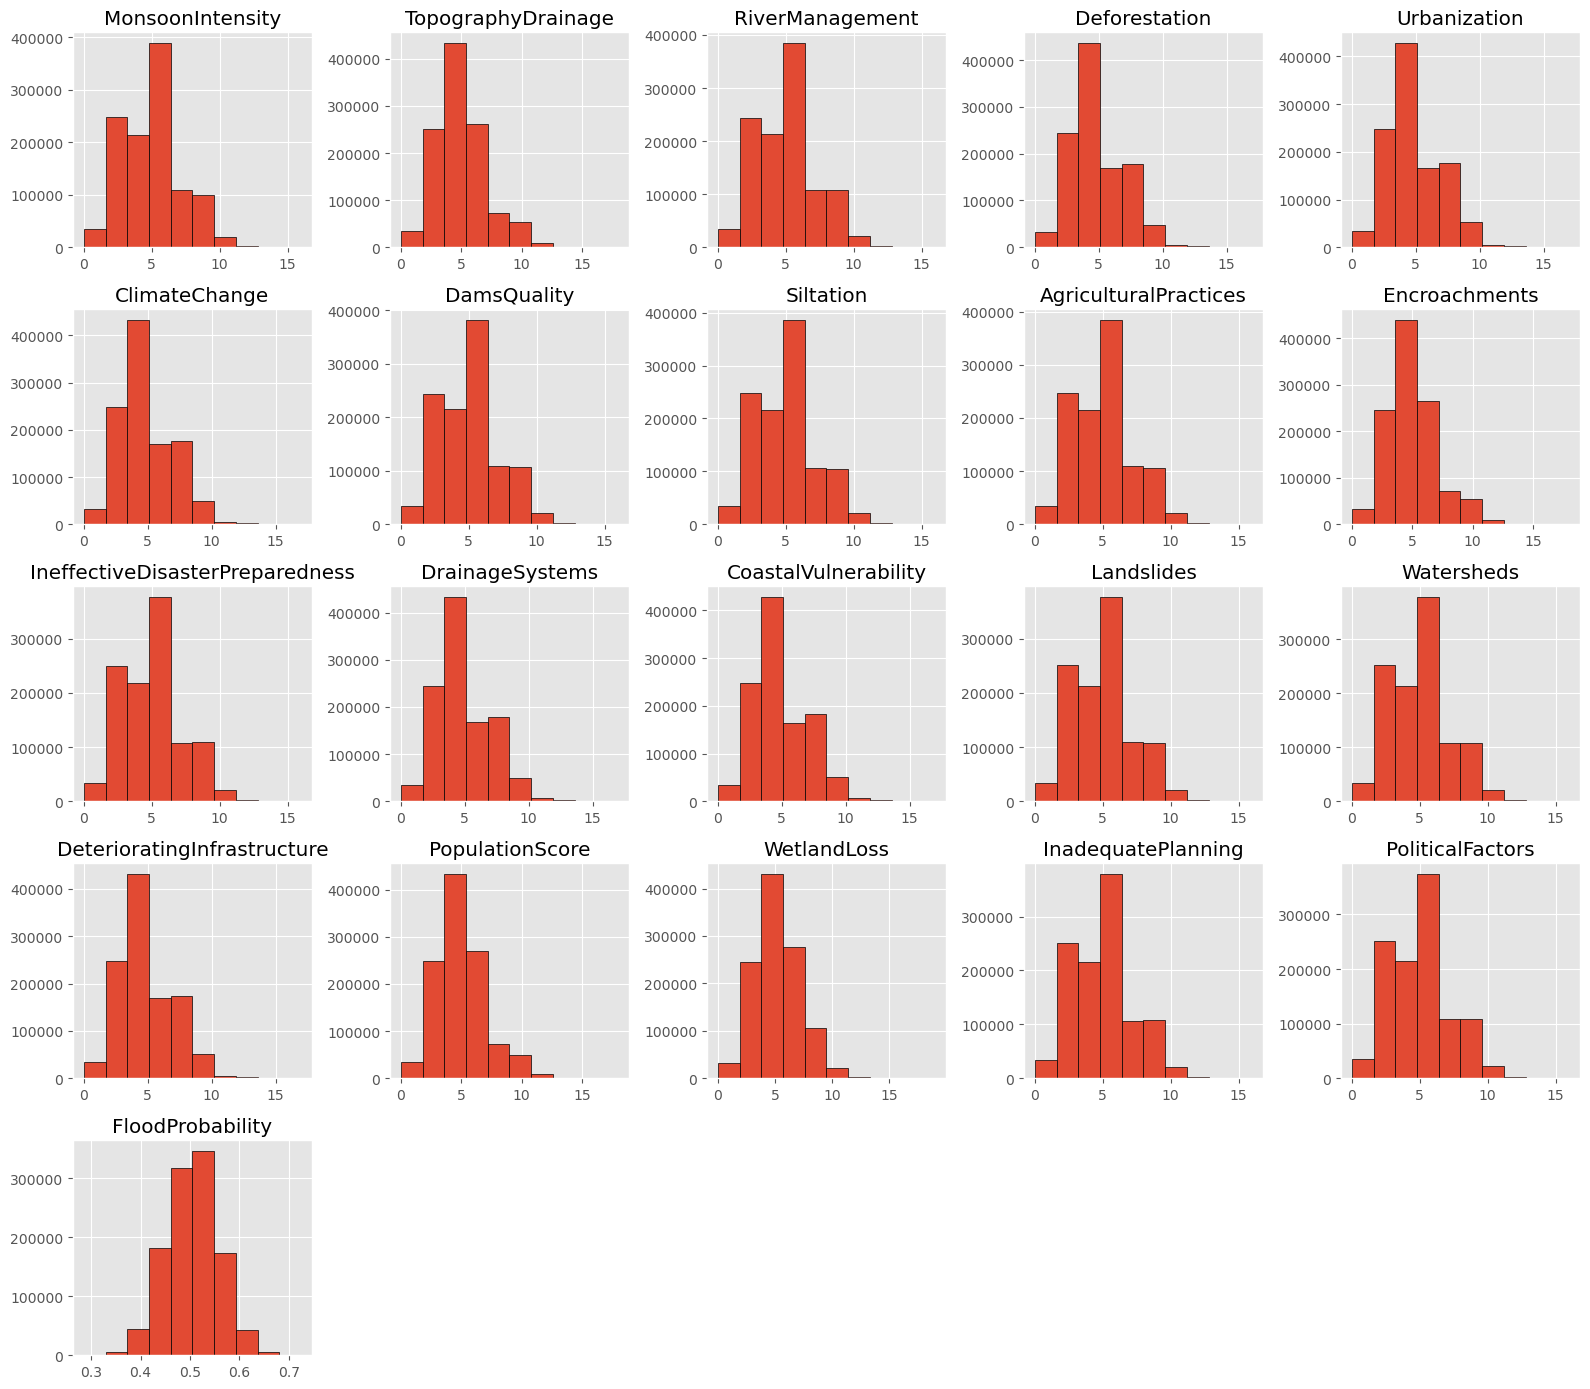

In [11]:
from matplotlib import pyplot
train_df.hist(figsize=(16, 14), edgecolor='black')
pyplot.tight_layout()
pyplot.show()

Flood Prediction determination from population+land+climate+political factors

<Axes: xlabel='ClimateChange', ylabel='Deforestation'>

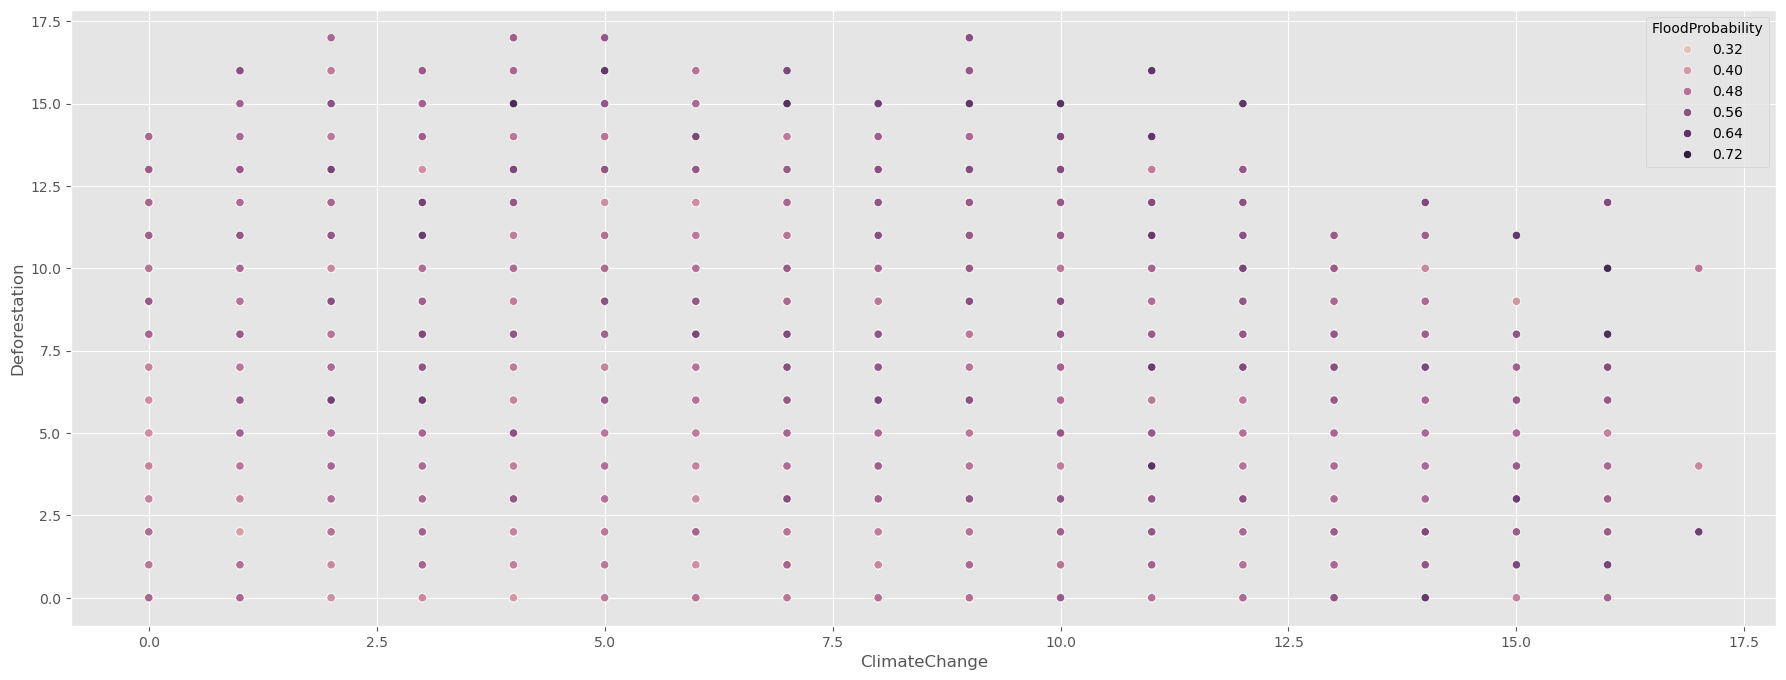

In [12]:
plt.figure(figsize = (22,8))
sns.scatterplot(x = train_df["ClimateChange"], y = train_df["Deforestation"] , hue = train_df["FloodProbability"])

### Violin Plot analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'MonsoonIntensity'),
  Text(1, 0, 'TopographyDrainage'),
  Text(2, 0, 'RiverManagement'),
  Text(3, 0, 'Deforestation'),
  Text(4, 0, 'Urbanization'),
  Text(5, 0, 'ClimateChange'),
  Text(6, 0, 'DamsQuality'),
  Text(7, 0, 'Siltation'),
  Text(8, 0, 'AgriculturalPractices'),
  Text(9, 0, 'Encroachments'),
  Text(10, 0, 'IneffectiveDisasterPreparedness'),
  Text(11, 0, 'DrainageSystems'),
  Text(12, 0, 'CoastalVulnerability'),
  Text(13, 0, 'Landslides'),
  Text(14, 0, 'Watersheds'),
  Text(15, 0, 'DeterioratingInfrastructure'),
  Text(16, 0, 'PopulationScore'),
  Text(17, 0, 'WetlandLoss'),
  Text(18, 0, 'InadequatePlanning'),
  Text(19, 0, 'PoliticalFactors'),
  Text(20, 0, 'FloodProbability')])

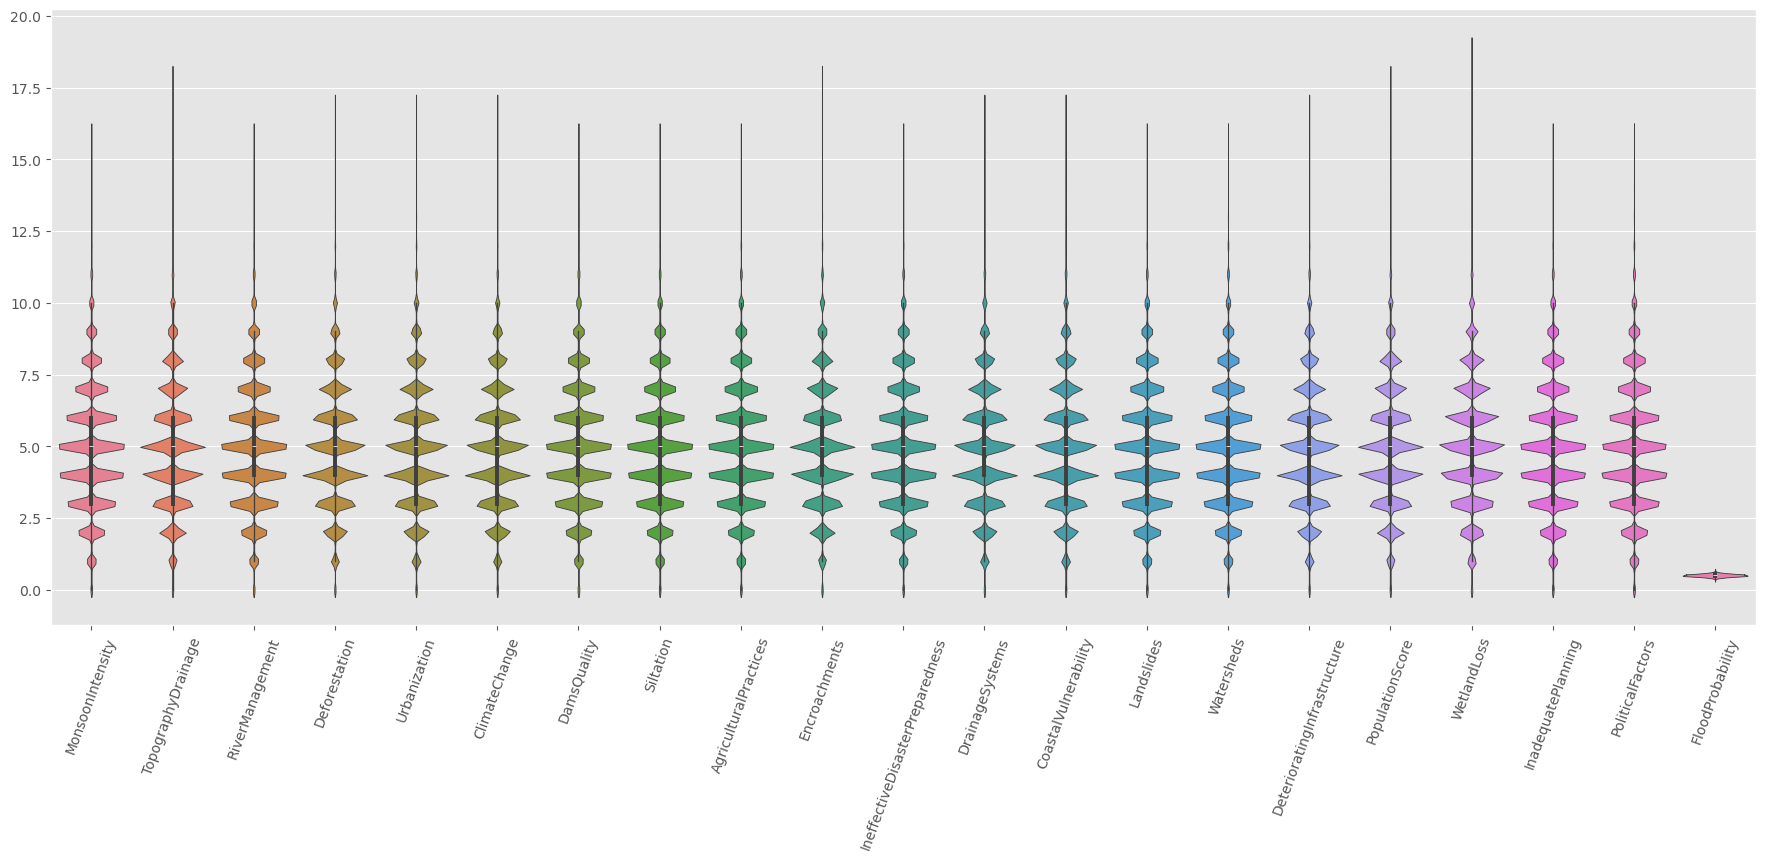

In [13]:
# to check distribution of data
plt.figure(figsize = (22,8))
sns.violinplot(train_df ) 
plt.xticks(rotation=70)

###### Analysis of Flood probability with other variables

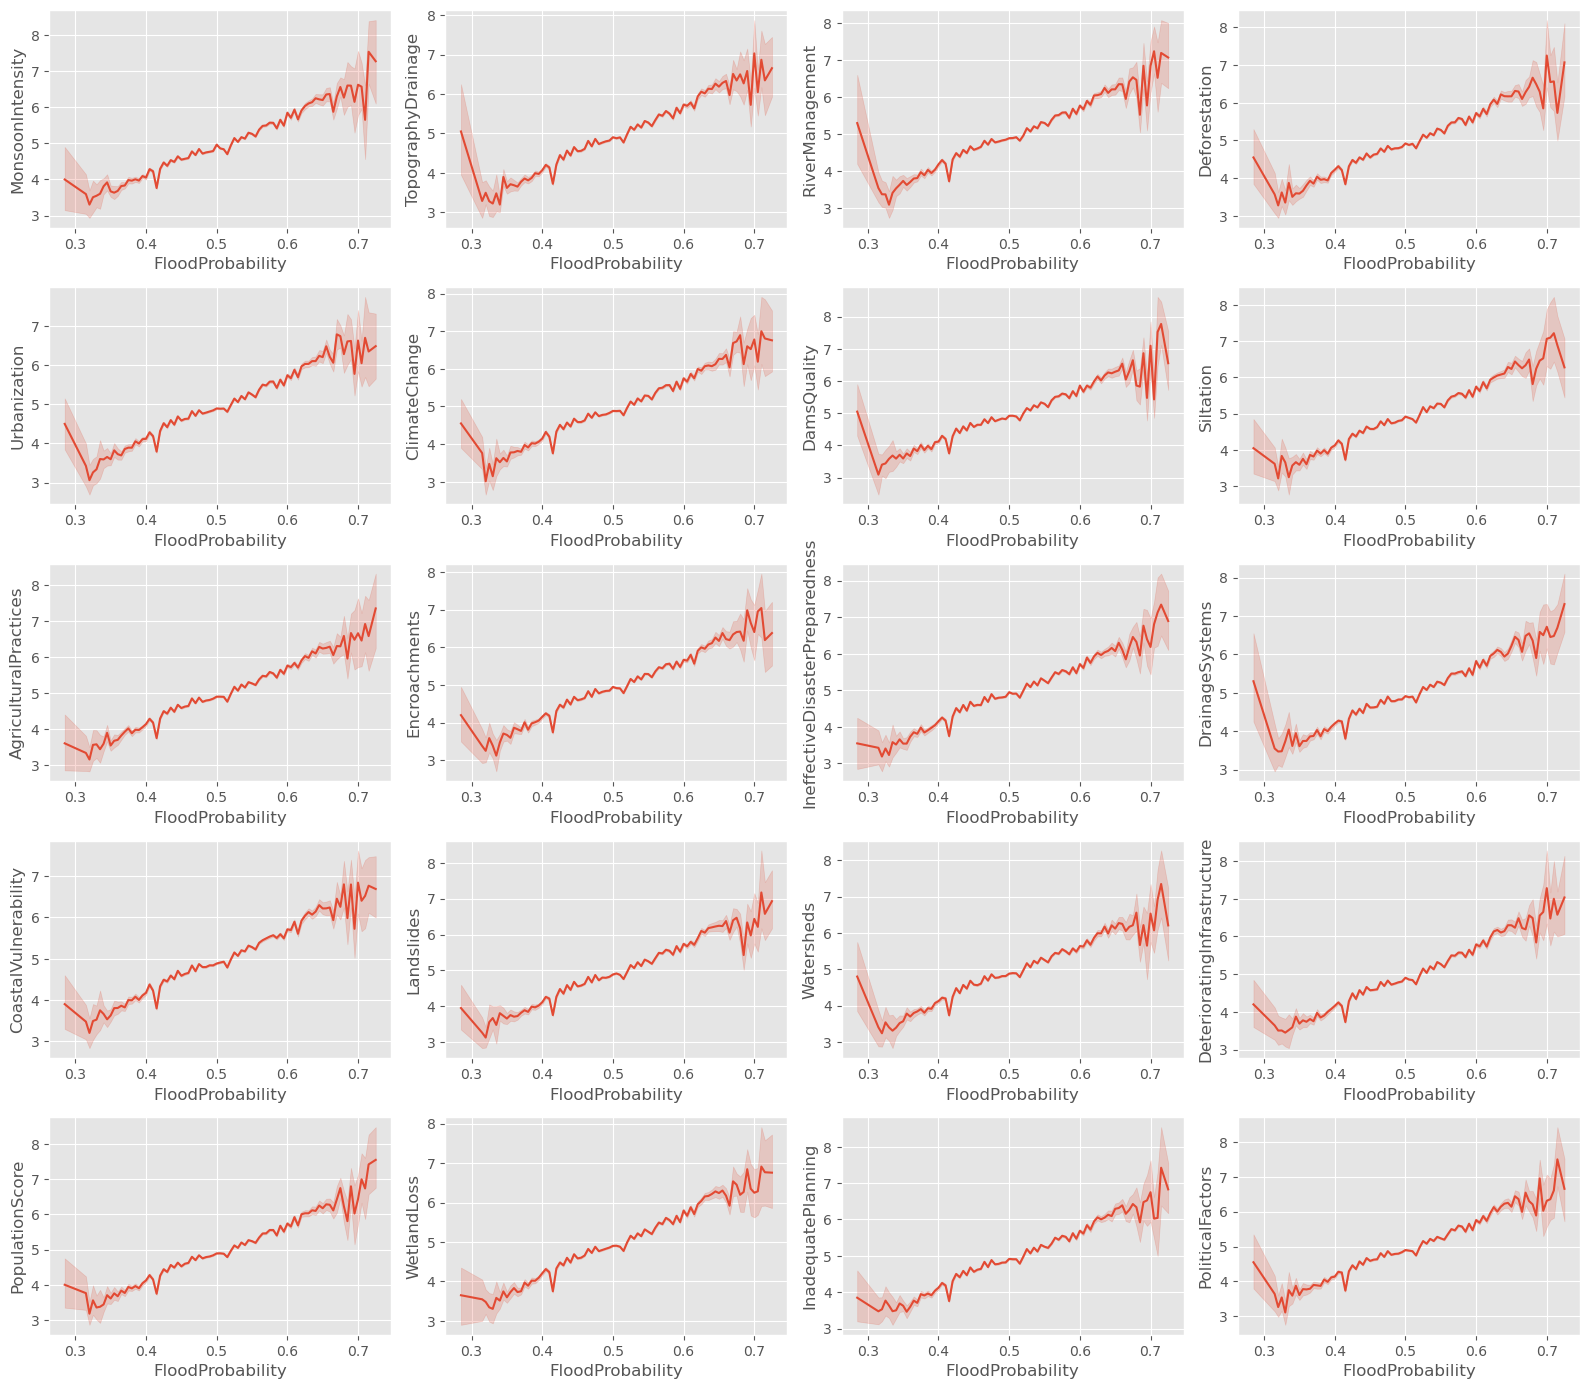

In [14]:
#checking the flood probability
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize = (16, 14))

sns.lineplot( x="FloodProbability", y='MonsoonIntensity', data = train_df, ax= ax[0,0])

sns.lineplot(x="FloodProbability", y='TopographyDrainage', data=train_df,ax= ax[0,1])

sns.lineplot(x="FloodProbability", y='RiverManagement', data=train_df, ax= ax[0,2])

sns.lineplot(x="FloodProbability", y='Deforestation', data=train_df, ax= ax[0,3])

sns.lineplot(x="FloodProbability", y='Urbanization', data=train_df, ax= ax[1,0])

sns.lineplot(x="FloodProbability", y='ClimateChange',  data=train_df, ax= ax[1,1])

sns.lineplot(x="FloodProbability", y='DamsQuality',  data=train_df, ax= ax[1,2])

sns.lineplot(x="FloodProbability", y='Siltation', data=train_df, ax= ax[1,3])

sns.lineplot(x="FloodProbability", y='AgriculturalPractices', data=train_df, ax= ax[2,0])

sns.lineplot(x="FloodProbability", y='Encroachments', data=train_df, ax= ax[2,1])

sns.lineplot(x="FloodProbability", y='IneffectiveDisasterPreparedness',  data=train_df, ax= ax[2,2])

sns.lineplot(x="FloodProbability", y='DrainageSystems',  data=train_df, ax= ax[2,3])

sns.lineplot(x="FloodProbability", y='CoastalVulnerability', data=train_df, ax= ax[3,0])

sns.lineplot(x="FloodProbability", y='Landslides', data=train_df, ax= ax[3,1])

sns.lineplot(x="FloodProbability", y='Watersheds', data=train_df, ax= ax[3,2])

sns.lineplot(x="FloodProbability", y='DeterioratingInfrastructure',  data=train_df, ax= ax[3,3])

sns.lineplot(x="FloodProbability", y='PopulationScore',  data=train_df, ax= ax[4,0])

sns.lineplot(x="FloodProbability", y='WetlandLoss', data=train_df, ax= ax[4,1])

sns.lineplot(x="FloodProbability", y='InadequatePlanning', data=train_df, ax= ax[4,2])

sns.lineplot(x="FloodProbability", y='PoliticalFactors', data=train_df, ax= ax[4,3])

plt.tight_layout()
plt.show()

#### Correaltion Matrix

Text(0.5, 1.0, 'correlation of feature')

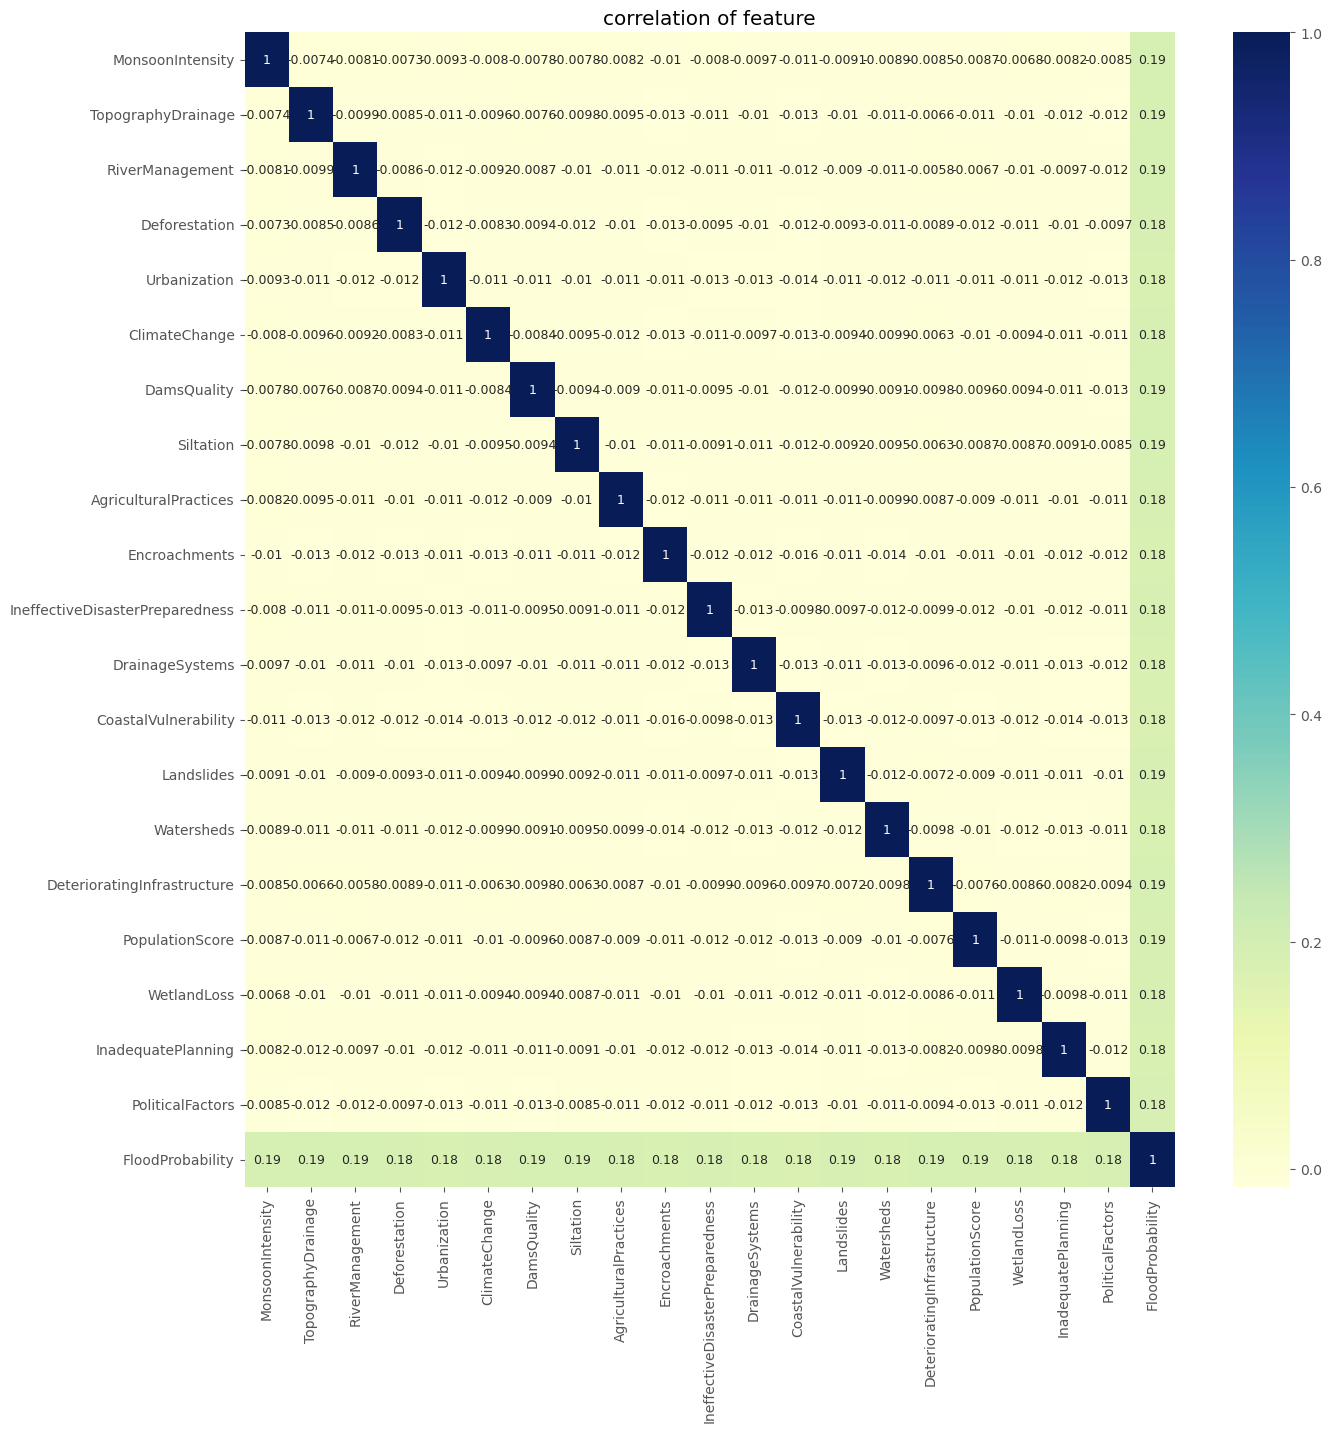

In [15]:
##Correlation between FloodProbability and other factors
plt.figure(figsize=(15,15))
corr = train_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True, annot_kws={"size":9})
plt.title("correlation of feature")


#### Data Modelling and training

In [16]:
X=train_df.iloc[:,:-1].values #  last columns not inculded
y=train_df.iloc[:,-1].values  # only last - target

# X_test=test_df.iloc[:,:].values  # all  columns inculded

In [17]:
X.shape, y.shape

((1117957, 20), (1117957,))

###### Data Modeling

In [18]:
#Train Test Split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((894365, 20), (223592, 20), (894365,), (223592,))

In [19]:
#scale variables in X to ensure same scale
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


In [23]:
# CatBoost
from catboost import CatBoostRegressor, CatBoostClassifier

cat_clf = CatBoostRegressor()
cat_clf.fit(x_train,y_train)
cat_clf_pred = cat_clf.predict(x_test)


Learning rate set to 0.119817
0:	learn: 0.0501301	total: 203ms	remaining: 3m 23s
1:	learn: 0.0492828	total: 267ms	remaining: 2m 13s
2:	learn: 0.0484265	total: 322ms	remaining: 1m 47s
3:	learn: 0.0476542	total: 369ms	remaining: 1m 31s
4:	learn: 0.0469081	total: 415ms	remaining: 1m 22s
5:	learn: 0.0461748	total: 463ms	remaining: 1m 16s
6:	learn: 0.0454743	total: 510ms	remaining: 1m 12s
7:	learn: 0.0448332	total: 559ms	remaining: 1m 9s
8:	learn: 0.0441758	total: 607ms	remaining: 1m 6s
9:	learn: 0.0435337	total: 655ms	remaining: 1m 4s
10:	learn: 0.0429632	total: 697ms	remaining: 1m 2s
11:	learn: 0.0424067	total: 739ms	remaining: 1m
12:	learn: 0.0418622	total: 780ms	remaining: 59.2s
13:	learn: 0.0413201	total: 822ms	remaining: 57.9s
14:	learn: 0.0408001	total: 864ms	remaining: 56.7s
15:	learn: 0.0402780	total: 906ms	remaining: 55.7s
16:	learn: 0.0397692	total: 949ms	remaining: 54.9s
17:	learn: 0.0392998	total: 989ms	remaining: 53.9s
18:	learn: 0.0388350	total: 1.03s	remaining: 53.1s
19:	lea

162:	learn: 0.0211079	total: 7.61s	remaining: 39.1s
163:	learn: 0.0210894	total: 7.66s	remaining: 39.1s
164:	learn: 0.0210708	total: 7.71s	remaining: 39s
165:	learn: 0.0210527	total: 7.76s	remaining: 39s
166:	learn: 0.0210352	total: 7.81s	remaining: 39s
167:	learn: 0.0210176	total: 7.86s	remaining: 38.9s
168:	learn: 0.0210004	total: 7.92s	remaining: 38.9s
169:	learn: 0.0209838	total: 7.97s	remaining: 38.9s
170:	learn: 0.0209676	total: 8.02s	remaining: 38.9s
171:	learn: 0.0209518	total: 8.07s	remaining: 38.8s
172:	learn: 0.0209360	total: 8.12s	remaining: 38.8s
173:	learn: 0.0209209	total: 8.17s	remaining: 38.8s
174:	learn: 0.0209058	total: 8.22s	remaining: 38.8s
175:	learn: 0.0208911	total: 8.28s	remaining: 38.7s
176:	learn: 0.0208763	total: 8.33s	remaining: 38.7s
177:	learn: 0.0208619	total: 8.38s	remaining: 38.7s
178:	learn: 0.0208479	total: 8.42s	remaining: 38.6s
179:	learn: 0.0208338	total: 8.47s	remaining: 38.6s
180:	learn: 0.0208198	total: 8.52s	remaining: 38.6s
181:	learn: 0.0208

322:	learn: 0.0200792	total: 15.9s	remaining: 33.3s
323:	learn: 0.0200777	total: 16s	remaining: 33.3s
324:	learn: 0.0200762	total: 16s	remaining: 33.3s
325:	learn: 0.0200748	total: 16.1s	remaining: 33.2s
326:	learn: 0.0200735	total: 16.1s	remaining: 33.2s
327:	learn: 0.0200722	total: 16.2s	remaining: 33.1s
328:	learn: 0.0200709	total: 16.2s	remaining: 33.1s
329:	learn: 0.0200697	total: 16.3s	remaining: 33s
330:	learn: 0.0200683	total: 16.3s	remaining: 33s
331:	learn: 0.0200669	total: 16.4s	remaining: 32.9s
332:	learn: 0.0200657	total: 16.4s	remaining: 32.9s
333:	learn: 0.0200646	total: 16.5s	remaining: 32.9s
334:	learn: 0.0200634	total: 16.5s	remaining: 32.8s
335:	learn: 0.0200623	total: 16.6s	remaining: 32.8s
336:	learn: 0.0200612	total: 16.6s	remaining: 32.7s
337:	learn: 0.0200600	total: 16.7s	remaining: 32.7s
338:	learn: 0.0200587	total: 16.7s	remaining: 32.6s
339:	learn: 0.0200576	total: 16.8s	remaining: 32.6s
340:	learn: 0.0200563	total: 16.8s	remaining: 32.5s
341:	learn: 0.020055

481:	learn: 0.0199684	total: 24.5s	remaining: 26.3s
482:	learn: 0.0199681	total: 24.5s	remaining: 26.3s
483:	learn: 0.0199678	total: 24.6s	remaining: 26.2s
484:	learn: 0.0199674	total: 24.6s	remaining: 26.2s
485:	learn: 0.0199671	total: 24.7s	remaining: 26.1s
486:	learn: 0.0199667	total: 24.8s	remaining: 26.1s
487:	learn: 0.0199664	total: 24.8s	remaining: 26s
488:	learn: 0.0199659	total: 24.9s	remaining: 26s
489:	learn: 0.0199655	total: 24.9s	remaining: 25.9s
490:	learn: 0.0199653	total: 25s	remaining: 25.9s
491:	learn: 0.0199649	total: 25s	remaining: 25.8s
492:	learn: 0.0199645	total: 25.1s	remaining: 25.8s
493:	learn: 0.0199642	total: 25.1s	remaining: 25.7s
494:	learn: 0.0199639	total: 25.2s	remaining: 25.7s
495:	learn: 0.0199635	total: 25.2s	remaining: 25.6s
496:	learn: 0.0199630	total: 25.3s	remaining: 25.6s
497:	learn: 0.0199627	total: 25.3s	remaining: 25.6s
498:	learn: 0.0199624	total: 25.4s	remaining: 25.5s
499:	learn: 0.0199621	total: 25.5s	remaining: 25.5s
500:	learn: 0.019961

642:	learn: 0.0199182	total: 33.4s	remaining: 18.5s
643:	learn: 0.0199180	total: 33.4s	remaining: 18.5s
644:	learn: 0.0199177	total: 33.5s	remaining: 18.4s
645:	learn: 0.0199174	total: 33.5s	remaining: 18.4s
646:	learn: 0.0199170	total: 33.6s	remaining: 18.3s
647:	learn: 0.0199167	total: 33.7s	remaining: 18.3s
648:	learn: 0.0199164	total: 33.7s	remaining: 18.2s
649:	learn: 0.0199160	total: 33.8s	remaining: 18.2s
650:	learn: 0.0199158	total: 33.8s	remaining: 18.1s
651:	learn: 0.0199156	total: 33.9s	remaining: 18.1s
652:	learn: 0.0199155	total: 33.9s	remaining: 18s
653:	learn: 0.0199151	total: 34s	remaining: 18s
654:	learn: 0.0199149	total: 34.1s	remaining: 17.9s
655:	learn: 0.0199147	total: 34.1s	remaining: 17.9s
656:	learn: 0.0199145	total: 34.2s	remaining: 17.8s
657:	learn: 0.0199143	total: 34.2s	remaining: 17.8s
658:	learn: 0.0199139	total: 34.3s	remaining: 17.7s
659:	learn: 0.0199137	total: 34.3s	remaining: 17.7s
660:	learn: 0.0199134	total: 34.4s	remaining: 17.6s
661:	learn: 0.0199

803:	learn: 0.0198711	total: 42.4s	remaining: 10.3s
804:	learn: 0.0198709	total: 42.5s	remaining: 10.3s
805:	learn: 0.0198707	total: 42.5s	remaining: 10.2s
806:	learn: 0.0198706	total: 42.6s	remaining: 10.2s
807:	learn: 0.0198702	total: 42.6s	remaining: 10.1s
808:	learn: 0.0198700	total: 42.7s	remaining: 10.1s
809:	learn: 0.0198699	total: 42.8s	remaining: 10s
810:	learn: 0.0198694	total: 42.8s	remaining: 9.98s
811:	learn: 0.0198692	total: 42.9s	remaining: 9.93s
812:	learn: 0.0198691	total: 42.9s	remaining: 9.88s
813:	learn: 0.0198689	total: 43s	remaining: 9.82s
814:	learn: 0.0198687	total: 43.1s	remaining: 9.77s
815:	learn: 0.0198685	total: 43.1s	remaining: 9.72s
816:	learn: 0.0198681	total: 43.2s	remaining: 9.67s
817:	learn: 0.0198679	total: 43.2s	remaining: 9.62s
818:	learn: 0.0198676	total: 43.3s	remaining: 9.57s
819:	learn: 0.0198675	total: 43.3s	remaining: 9.52s
820:	learn: 0.0198672	total: 43.4s	remaining: 9.46s
821:	learn: 0.0198668	total: 43.5s	remaining: 9.41s
822:	learn: 0.01

964:	learn: 0.0198297	total: 51.6s	remaining: 1.87s
965:	learn: 0.0198294	total: 51.7s	remaining: 1.82s
966:	learn: 0.0198291	total: 51.8s	remaining: 1.77s
967:	learn: 0.0198289	total: 51.8s	remaining: 1.71s
968:	learn: 0.0198286	total: 51.9s	remaining: 1.66s
969:	learn: 0.0198284	total: 51.9s	remaining: 1.6s
970:	learn: 0.0198280	total: 52s	remaining: 1.55s
971:	learn: 0.0198278	total: 52s	remaining: 1.5s
972:	learn: 0.0198274	total: 52.1s	remaining: 1.45s
973:	learn: 0.0198270	total: 52.1s	remaining: 1.39s
974:	learn: 0.0198266	total: 52.2s	remaining: 1.34s
975:	learn: 0.0198262	total: 52.2s	remaining: 1.28s
976:	learn: 0.0198259	total: 52.3s	remaining: 1.23s
977:	learn: 0.0198256	total: 52.4s	remaining: 1.18s
978:	learn: 0.0198251	total: 52.4s	remaining: 1.12s
979:	learn: 0.0198247	total: 52.5s	remaining: 1.07s
980:	learn: 0.0198244	total: 52.5s	remaining: 1.02s
981:	learn: 0.0198242	total: 52.6s	remaining: 964ms
982:	learn: 0.0198240	total: 52.6s	remaining: 910ms
983:	learn: 0.0198

#### Predict on test dataset

In [24]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [25]:
ids = test_df['id']

In [26]:
# Remove Id Column
test_df.drop(['id'], axis=1, inplace=True)
test_df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [27]:
test_df.shape,train_df.shape

((745305, 20), (1117957, 21))

In [28]:
X_test=test_df.iloc[:,:].values  # all  columns inculded

In [29]:
# Standardize features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [30]:
# predict on test dataset
Y_pred = cat_clf.predict(X_test)

In [31]:
Y_pred.shape, X_test.shape

((745305,), (745305, 20))

In [32]:
Y_pred

array([0.5739506 , 0.45399501, 0.45421101, ..., 0.62747468, 0.55081142,
       0.51279857])

In [33]:

cat_out_df = pd.DataFrame({'id': ids, 'FloodProbability': Y_pred}) #
cat_out_df.head()

,id,FloodProbability
0,1117957,0.573951
1,1117958,0.453995
2,1117959,0.454211
3,1117960,0.465974
4,1117961,0.465090
...,...,...
745300,1863257,0.477082
745301,1863258,0.450481
745302,1863259,0.627475
745303,1863260,0.550811


In [34]:
# Save the predictions to a CSV file
cat_out_df.to_csv('submission_cat.csv', index=False)

#### Evaluation of Model

In [49]:
#Evaluation

def evaluation(y_test,y_pred):

    from sklearn.metrics import r2_score
    print("R2 Score : ",round(r2_score(y_test,y_pred), 5))

    from sklearn.metrics import mean_absolute_error
    print("Mean absolute error : ",round(mean_absolute_error(y_test, y_pred), 5))


In [50]:
evaluation(y_test,cat_clf_pred) #Logistic Regression

R2 Score :  0.84721
Mean absolute error :  0.01582


Interpreting R2 Score:

    R2 = 1: Perfect fit. The model explains all the variability in the target variable.
    R2 = 0: The model does not explain any variability in the target variable.
    0 < R2 < 1: The model explains a proportion of the variability in the target variable.
    A higher R2 score indicates a better fit,